# RENEWABLE ENERGY CONSUMPTION
This application is mostly used for collecting data on renewable energy consumption in certain countries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)###set the default size of figure
plt.rcParams['font.size'] = 14###set the default font size

In [2]:
re=pd.read_csv('modern-renewable-energy-consumption.csv')
re.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
0,Africa,NaN,1965,14.278806,0.0,0.0,0.0
1,Africa,NaN,1966,15.649049,0.0,0.0,0.0
2,Africa,NaN,1967,16.158333,0.0,0.0,0.0
3,Africa,NaN,1968,18.622983,0.0,0.0,0.0
4,Africa,NaN,1969,21.582897,0.0,0.0,0.0


The data is about the consumption of renewable energy sources like hydropower, solar, wind, geothermal and modern biofuel production for all the countries from the year 1965 to 2018

In [3]:
re.isnull().sum()##identify the null values

Entity                                  0
Code                                 1006
Year                                    0
Hydropower (terawatt-hours)             0
Solar (terawatt-hours)                  0
Wind (terawatt-hours)                   0
Other renewables (terawatt-hours)      54
dtype: int64

In [4]:
#get a list of countries which have no code.
country_code_na=list(re[re['Code'].isnull()]['Entity'].unique())
country_code_na

['Africa',
 'Asia Pacific',
 'CIS',
 'Central America',
 'Eastern Africa',
 'Europe',
 'Europe (other)',
 'Middle Africa',
 'Middle East',
 'North America',
 'Other Asia & Pacific',
 'Other CIS',
 'Other Caribbean',
 'Other Middle East',
 'Other Northern Africa',
 'Other South America',
 'Other Southern Africa',
 'South & Central America',
 'Western Africa']

In [5]:
#create a list of the code for the countries mentioned above.
code=['AF','APAC','CIS','CA','EAF','EU','EU','CAF','ME','NA','APAC','CIS','CARIB','ME','NAF','SA','SAF','CASA','WAF']

#create a dictionary for the countries and their codes.
replace_null_code=dict(zip(country_code_na,code))
replace_null_code

{'Africa': 'AF',
 'Asia Pacific': 'APAC',
 'CIS': 'CIS',
 'Central America': 'CA',
 'Eastern Africa': 'EAF',
 'Europe': 'EU',
 'Europe (other)': 'EU',
 'Middle Africa': 'CAF',
 'Middle East': 'ME',
 'North America': 'NA',
 'Other Asia & Pacific': 'APAC',
 'Other CIS': 'CIS',
 'Other Caribbean': 'CARIB',
 'Other Middle East': 'ME',
 'Other Northern Africa': 'NAF',
 'Other South America': 'SA',
 'Other Southern Africa': 'SAF',
 'South & Central America': 'CASA',
 'Western Africa': 'WAF'}

In [6]:
#replace the null code with the their corresponding country based on the dictionary above.
re['Code']=re['Code'].fillna(re['Entity'].apply(lambda x : replace_null_code.get(x)))
re[re['Entity']=='Europe']


,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
1319,Europe,EU,1965,302.516086,0.000000,0.000000,3.009000
1320,Europe,EU,1966,325.221337,0.000000,0.000000,4.101000
1321,Europe,EU,1967,325.063456,0.000000,0.000000,4.489000
1322,Europe,EU,1968,336.871933,0.000000,0.000000,4.997000
1323,Europe,EU,1969,331.779441,0.000000,0.000000,5.422904
1324,Europe,EU,1970,346.957866,0.000000,0.000000,7.118357
1325,Europe,EU,1971,351.107456,0.000000,0.000000,7.231884
1326,Europe,EU,1972,364.168942,0.000000,0.000000,7.122608
1327,Europe,EU,1973,369.980286,0.000000,0.000000,7.663391
1328,Europe,EU,1974,399.544636,0.000000,0.000000,8.042060


In [7]:
re.isnull().sum()

Entity                                0
Code                                  0
Year                                  0
Hydropower (terawatt-hours)           0
Solar (terawatt-hours)                0
Wind (terawatt-hours)                 0
Other renewables (terawatt-hours)    54
dtype: int64

In [11]:
print(re[re['Other renewables (terawatt-hours)'].isnull()].shape[0])
re[re['Other renewables (terawatt-hours)'].isnull()]

54


,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
3212,Other Northern Africa,NAF,1965,0.220970,0.000000,0.00000,NaN
3213,Other Northern Africa,NAF,1966,0.190034,0.000000,0.00000,NaN
3214,Other Northern Africa,NAF,1967,0.172357,0.000000,0.00000,NaN
3215,Other Northern Africa,NAF,1968,0.194454,0.000000,0.00000,NaN
3216,Other Northern Africa,NAF,1969,0.251906,0.000000,0.00000,NaN
3217,Other Northern Africa,NAF,1970,0.243067,0.000000,0.00000,NaN
3218,Other Northern Africa,NAF,1971,0.278422,0.000000,0.00000,NaN
3219,Other Northern Africa,NAF,1972,0.291680,0.000000,0.00000,NaN
3220,Other Northern Africa,NAF,1973,0.225389,0.000000,0.00000,NaN
3221,Other Northern Africa,NAF,1974,0.238648,0.000000,0.00000,NaN


In [12]:
re['Other renewables (terawatt-hours)'].fillna(0,inplace=True)

In [13]:
re.isnull().sum()

Entity                               0
Code                                 0
Year                                 0
Hydropower (terawatt-hours)          0
Solar (terawatt-hours)               0
Wind (terawatt-hours)                0
Other renewables (terawatt-hours)    0
dtype: int64

In [14]:
re[re['Entity']=='Other Northern Africa']

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
3212,Other Northern Africa,NAF,1965,0.220970,0.000000,0.00000,0.0
3213,Other Northern Africa,NAF,1966,0.190034,0.000000,0.00000,0.0
3214,Other Northern Africa,NAF,1967,0.172357,0.000000,0.00000,0.0
3215,Other Northern Africa,NAF,1968,0.194454,0.000000,0.00000,0.0
3216,Other Northern Africa,NAF,1969,0.251906,0.000000,0.00000,0.0
3217,Other Northern Africa,NAF,1970,0.243067,0.000000,0.00000,0.0
3218,Other Northern Africa,NAF,1971,0.278422,0.000000,0.00000,0.0
3219,Other Northern Africa,NAF,1972,0.291680,0.000000,0.00000,0.0
3220,Other Northern Africa,NAF,1973,0.225389,0.000000,0.00000,0.0
3221,Other Northern Africa,NAF,1974,0.238648,0.000000,0.00000,0.0


Explanation on the class renewable_energy()

Upon calling for the renewable_energy() class, the program will ask the user to type in the country based on the Entity list in the DataFrame.

get_country_renewables() will return the DataFrame of the chosen country.

get_plot() will return a visualization of a certain type of renewable energy consumed in the country. Here, the user can choose for the type of renewable energy that they want to get.

get_most_consumption() will return a visualiation of the 5 countries with the most renewable energy consumption in the latest year.

compare_renewable() will return a visualization of the renewable energies that the user wants to compare.

In [36]:
class renewable_energy():
    entities=list(re['Entity'].unique())   #get a list of countries in the dataframe
    print('Country List: \n{}'.format(entities)) #print out the countries available in the Dataframe
    country=input('Enter a country/region/continent/world: ') #user type in a country
    
    renewable_types=list(re.columns[3:7])
    years=list(re['Year'].unique())
    latest_year=years[-1]
    
    while True:  #loop the input if the country is not in the dataframe
        
        if country not in entities:
            
            country=input('Invalid country,try again: ')
        else:
            break
        
    def get_country_renewables(self):##get the info on the dataframe for a certain country
        return re[re['Entity']==self.country] 
    
    def get_plot(self):
        print('Choose a category:\n\
        Enter 1 for Hydropower, 2 for Solar, 3 for Wind or 4 for other renewables.')
        while True:
            try:
                user_input=int(input('Enter number: '))
                while user_input <7 or user_input>0:
                    hydro=re[re['Entity']==self.country].set_index('Year')[self.renewable_types[0]]
                    solar=re[re['Entity']==self.country].set_index('Year')[self.renewable_types[1]]
                    wind=re[re['Entity']==self.country].set_index('Year')[self.renewable_types[2]]
                    other= re[re['Entity']==self.country].set_index('Year')[self.renewable_types[3]]
            
                    if user_input==1:
                        return hydro.plot(title='Hydropower Consumption in {}'\
                                          .format(self.country)).set(ylabel='Terrawatt-Hours')
                    elif user_input==2:
                        return solar.plot(title='Solar Power Consumption in {}'\
                                          .format(self.country)).set(ylabel='Terrawatt-Hours')
                    elif user_input==3:
                        return wind.plot(title='Wind Power Consumption in {}'\
                                         .format(self.country)).set(ylabel='Terrawatt-Hours')
                    elif user_input==4:
                        return other.plot(title='Geothermal and Modern Biofuel Production Consumption in {}'\
                                          .format(self.country)).set(ylabel='Terrawatt-Hours')
                    else:
                        user_input=int(input('Invalid number, please enter a number between 1-4:\n '))
            except :
                print("Invalid characters, please enter a number.")
                continue  
    
    def compare_renewable(self):
        print('To compare:\n\
                Hydro and Solar, Enter 1\n\
                Hydro and Wind, Enter 2\n\
                Hydro and Other Renewables, Enter 3\n\
                Hydro, Solar and Wind, Enter 4\n\
                Solar and Wind, Enter 5\n\
                Hydro, Solar,Wind and Other Renewables, Enter 6')
        
        while True:
            try:
       
                user_input=int(input('Enter number: '))

                while user_input <7 or user_input>0:
                    country_df=re[re['Entity']==self.country].set_index('Year')
                    hydro_solar=country_df[self.renewable_types[0:2]]
                    hydro_wind=country_df[self.renewable_types[0:3:2]]
                    hydro_other=country_df[self.renewable_types[0:4:3]]
                    hydro_solar_wind=country_df[self.renewable_types[0:3]]
                    solar_wind=country_df[self.renewable_types[1:3]]
                    all_renewable=country_df[self.renewable_types]
                    if user_input==1:
                        return hydro_solar.plot(title='Hydro and Solar Power Consumption in {}'\
                                                .format(self.country)).set(xlabel='Year',ylabel='Terrawatt-Hours')
                    elif user_input==2:
                        return hydro_wind.plot(title='Hydro and Wind Power Consumption in {}'\
                                               .format(self.country)).set(xlabel='Year',ylabel='Terrawatt-Hours')
                    elif user_input==3:
                        return hydro_other.plot(title='Hydro Power and Other Renewables(Geothermal and Modern Biofuel) Consumption in {}'\
                                                .format(self.country)).set(xlabel='Year',ylabel='Terrawatt-Hours')
                    elif user_input==4:
                        return hydro_solar_wind.plot(title='Hydro, Solar and Wind Power Consumption in {}'\
                                                     .format(self.country)).set(xlabel='Year',ylabel='Terrawatt-Hours')
                    elif user_input==5:
                        return solar_wind.plot(title='Solar and Wind Power Consumption in {}'\
                                               .format(self.country)).set(xlabel='Year',ylabel='Terrawatt-Hours')
                    elif user_input==6:
                        return all_renewable.plot(title='Renewable Energy Consumption in {}'\
                                                  .format(self.country)).set(xlabel='Year',ylabel='Terrawatt-Hours')
                    else:
                        user_input=int(input('Invalid number, please enter a number between 1-4:: '))  
                        
            except:
                print('Invalid characters, please enter a number.')
                continue
            
                
    def get_most_consumption(self):
        continent_region_world=['Africa','Asia Pacific','Central America','CIS','Eastern Africa','Europe', 'Europe (other)',\
                       'Middle Africa','Middle East','North America','Other Asia & Pacific','Other CIS', 'Other Caribbean',\
                       'Other Middle East', 'Other Northern Africa','Other South America', 'Other Southern Africa',\
                       'South & Central America','USSR','World','Western Africa']
        is_country=re.set_index('Entity').drop(continent_region_world)
        
        latest=is_country[is_country['Year']==self.latest_year]
        print('Countries available in the Data: {}'.format(list(is_country.index.unique())))
        print('Top 5 Countries with Most Renewable Consumption\n\
        Choose a category:\n\
        Enter 1 for Hydropower, 2 for Solar, 3 for Wind, 4 for other renewables, 5 for all.')
        while True:
            try:
                user_input=int(input('Enter number: '))
                while user_input <6 or user_input>0:
                    hydro=latest.sort_values(by=[self.renewable_types[0]],ascending=False)[self.renewable_types[0]].head(5)
                    solar=latest.sort_values(by=[self.renewable_types[1]],ascending=False)[self.renewable_types[1]].head(5)
                    wind=latest.sort_values(by=[self.renewable_types[2]],ascending=False)[self.renewable_types[2]].head(5)
                    other= latest.sort_values(by=[self.renewable_types[3]],ascending=False)[self.renewable_types[3]].head(5)
                    all_renewable=latest.sort_values(by=self.renewable_types,ascending=False)[self.renewable_types].sum(axis=1).head(5)
                    plt.xlabel('Terawatt-hours')
                    if user_input==1:
                        return hydro.plot(kind='barh',title='Top 5 Countries with Most Hydropower Consumption in {}'\
                                      .format(self.years[-1]))
                    elif user_input==2:
                        return solar.plot(kind='barh',title='Top 5 Countries with Most Solar power Consumption in {}'\
                                      .format(self.years[-1]))
                    elif user_input==3:
                        return wind.plot(kind='barh',title='Top 5 Countries with Most Wind Power Consumption in {}'\
                                     .format(self.years[-1]))
                    elif user_input==4:
    
                        return other.plot(kind='barh',title='Top 5 Countries with Most Geothermal and Modern Biofuel Consumption in {}'\
                                          .format(self.years[-1]))
                    elif user_input==5:
                        return all_renewable.plot(kind='barh',title='Top 5 Countries with Most Renewable energy Consumption in {}'\
                                                  .format(self.years[-1]))
                    else:
                        user_input=int(input('Invalid number, enter a number between 1-5}: '))
            except :
                print("Invalid characters, please enter a number.")
                continue 
                
    
    
       
renewable=renewable_energy()

Country List: 
['Africa', 'Algeria', 'Argentina', 'Asia Pacific', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'CIS', 'Canada', 'Central America', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Eastern Africa', 'Ecuador', 'Egypt', 'Estonia', 'Europe', 'Europe (other)', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malaysia', 'Mexico', 'Middle Africa', 'Middle East', 'Morocco', 'Netherlands', 'New Zealand', 'North America', 'Norway', 'Oman', 'Other Asia & Pacific', 'Other CIS', 'Other Caribbean', 'Other Middle East', 'Other Northern Africa', 'Other South America', 'Other Southern Africa', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia

In [19]:
renewable.get_country_renewables()##get the info on the dataframe for a certain country

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
2476,Malaysia,MYS,1965,0.596619,0.000000,0.0,0.000000
2477,Malaysia,MYS,1966,0.707104,0.000000,0.0,0.000000
2478,Malaysia,MYS,1967,0.738040,0.000000,0.0,0.000000
2479,Malaysia,MYS,1968,0.817589,0.000000,0.0,0.000000
2480,Malaysia,MYS,1969,1.029720,0.000000,0.0,0.000000
2481,Malaysia,MYS,1970,1.303723,0.000000,0.0,0.000000
2482,Malaysia,MYS,1971,1.312562,0.000000,0.0,0.000000
2483,Malaysia,MYS,1972,1.241851,0.000000,0.0,0.000000
2484,Malaysia,MYS,1973,1.308142,0.000000,0.0,0.000000
2485,Malaysia,MYS,1974,1.294884,0.000000,0.0,0.000000


Choose a category:
        Enter 1 for Hydropower, 2 for Solar, 3 for Wind or 4 for other renewables.
Enter number: 2


[Text(0, 0.5, 'Terrawatt-Hours')]

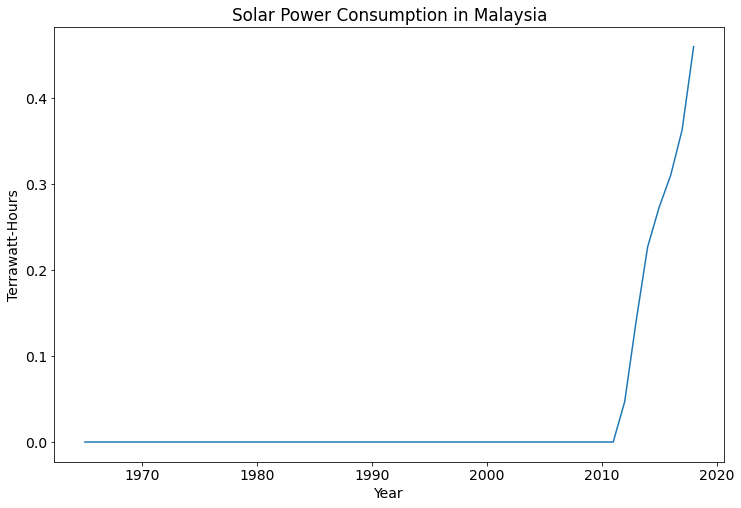

In [18]:
renewable.get_plot(); #get the line graph for 1 type of RE in the country

To compare:
                Hydro and Solar, Enter 1
                Hydro and Wind, Enter 2
                Hydro and Other Renewables, Enter 3
                Hydro, Solar and Wind, Enter 4
                Solar and Wind, Enter 5
                Hydro, Solar,Wind and Other Renewables, Enter 6
Enter number: 1


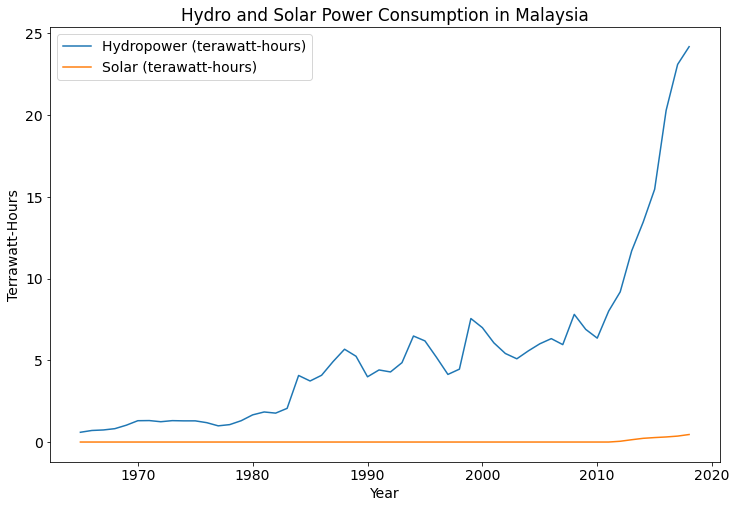

In [21]:
renewable.compare_renewable();#get the line graph for multiple types of RE in the country

Countries available in the Data: ['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Trinidad and Tobago', 'Turkey', 'Turkmenistan', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uzbekistan', 'Venezuela', 'Vietnam']
Top 5 Countries wit

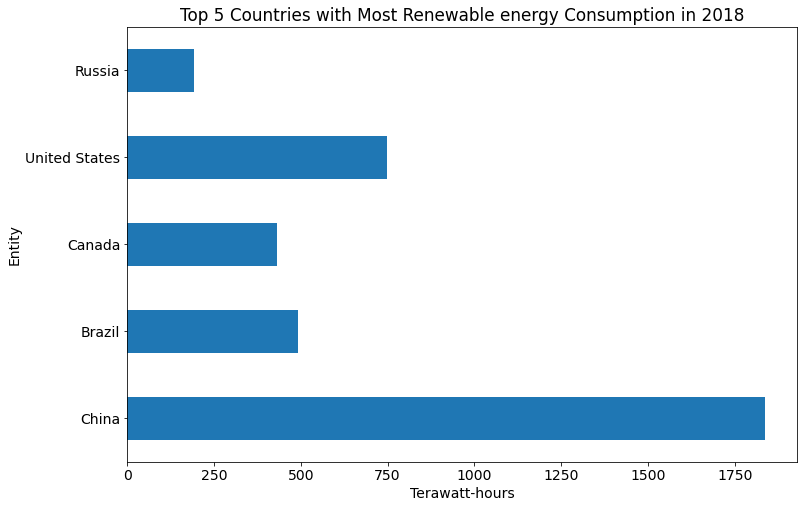

In [35]:
renewable.get_most_consumption();#get a bar graph of the 5 countries with the most RE consumption in the latest year

Explanation on the class compare_countries()

Upon calling for the compare_countries() class, the program will ask the user to type in the countries based on the Entity list in the DataFrame. The user have to type at least two diffferent countries, and type 'DONE' if the user had finished choosing countries. Then, the program will ask the user to type in the year they want to compare. 

countries_df() will return the DataFrame of the chosen countries.

countries_plot() will return a visualization of a certain type of renewable energy consumed in the countries. Here, the user can choose for the type of renewable energy that they want to get.


In [32]:
class compare_countries(): 
    renewable_types=list(re.columns[3:7])
    entities=list(re['Entity'].unique())
    length_of_years=re.groupby('Entity').count().sort_values(by='Year')
    less_than_54=length_of_years[length_of_years['Year']!=54]
    year_dict=less_than_54['Year'].to_dict()
    from65_84=[]
    from90_18=[]
    from85_18=[]
    for key,value in year_dict.items():
        if value == 20:
            from65_84.append(key)
        elif value == 29:
            from90_18.append(key)
        else:
            from85_18.append(key)

    print('List of country/region available in the Data: {}\n\
    Please be aware that some data on countries/regions are only available in a certain years:\n\
    {} only available in 1965-1984\n\
    {} only available in 1985-2018\n\
    {} only available in 1990-2018'.format(entities,from65_84,from85_18,from90_18))
    countries=[]
    user_input1=input('What are the countries that you want to compare?\n\
    Please make sure to capitalize or uppercase.\n\
    Enter a country: ')
    while True:  #loop the input if the country is not in the dataframe
        
        if user_input1 not in entities:
            
            user_input1=input('Invalid country,try again: ')
        else:
            break
            
    user_input2=input('Enter another country: ')
    while True:  #loop the input if the country is not in the dataframe
        
        if user_input2 not in entities or user_input2==user_input1:
            
            user_input2=input('Invalid country,try again: ')
        else:
            break
            
    countries.extend([user_input1,user_input2])  
    
    while True:
        user_input3=input("Enter another country or enter 'DONE' if you are done choosing countries.\n\
        Enter: ")
    
        if user_input3 == "DONE":
            break
    
        elif user_input3 not in entities  or user_input3==user_input1 or user_input3==user_input2:
            user_input3=input('Invalid country,try again: ')
            if user_input3 in entities and user_input3!=user_input1 and user_input3!=user_input2:
                    countries.append(user_input3)
            elif user_input3 == "DONE":
                    break
            
        else: 
            countries.append(user_input3)
            continue
                
    years=list(re['Year'].unique())
    earliest=years[0]
    latest=years[-1]
    year=eval(input('Pick a year between {} - {}: '.format(earliest,latest)))
    while True:
        if year not in years:
            year=eval(input('Invalid year, try again: '))
        else:
            break
    
    def countries_df(self):            
        countries_df=re[re['Year']==self.year].set_index('Entity').loc[self.countries] 
        return countries_df
    
    def countries_plot(self):
        print('To compare:\n\
        Enter 1 for Hydropower, 2 for Solar, 3 for Wind, 4 for other renewables, 5 for all.')
        while True:
            try:
                user_input=int(input('Enter number: '))
                while user_input <6 or user_input>0:
                   
                    if user_input==1:
                        return self.countries_df()[self.renewable_types[0]].plot(kind='barh',title='Hydropower Consumption in {}'\
                                      .format(self.year)).set(xlabel='Terawatt-hours')
                    elif user_input==2:
                        return self.countries_df()[self.renewable_types[1]].plot(kind='barh',title='Solar power Consumption in {}'\
                                      .format(self.year)).set(xlabel='Terawatt-hours')
                    elif user_input==3:
                        return self.countries_df()[self.renewable_types[2]].plot(kind='barh',title='Wind Power Consumption in {}'\
                                     .format(self.year)).set(xlabel='Terawatt-hours')
                    elif user_input==4:
    
                        return self.countries_df()[self.renewable_types[3]].plot(kind='barh',\
                                                                      title='Geothermal and Modern Biofuel Consumption in {}'\
                                                                      .format(self.year)).set(xlabel='Terawatt-hours')
                    elif user_input==5:
                        return self.countries_df()[self.renewable_types].sum(axis=1).plot(kind='barh',\
                                                                               title='Renewable energy Consumption in {}'\
                                                                               .format(self.year)).set(xlabel='Terawatt-hours')
                    else:
                        user_input=int(input('Invalid number, enter a number between 1-5: '))
            except Exception as ex:#as is an alias(another name)
                print("There is an error: {} with exception: {}".format(type(ex).__name__,ex.args))
                print("Invalid characters, please enter a number.")
                continue 
                
renewable1=compare_countries()

List of country/region available in the Data: ['Africa', 'Algeria', 'Argentina', 'Asia Pacific', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'CIS', 'Canada', 'Central America', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Eastern Africa', 'Ecuador', 'Egypt', 'Estonia', 'Europe', 'Europe (other)', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malaysia', 'Mexico', 'Middle Africa', 'Middle East', 'Morocco', 'Netherlands', 'New Zealand', 'North America', 'Norway', 'Oman', 'Other Asia & Pacific', 'Other CIS', 'Other Caribbean', 'Other Middle East', 'Other Northern Africa', 'Other South America', 'Other Southern Africa', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Si

In [33]:
renewable1.countries_df()#get the dataframe for the countries

,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
Entity,,,,,,
Russia,RUS,2018,190.21311,0.571060,0.227740,0.464500
United States,USA,2018,288.70634,97.118182,277.729106,83.677037
China,CHN,2018,1202.43000,177.500000,366.000000,90.723462


To compare:
        Enter 1 for Hydropower, 2 for Solar, 3 for Wind, 4 for other renewables, 5 for all.
Enter number: f
There is an error: ValueError with exception: ("invalid literal for int() with base 10: 'f'",)
Invalid characters, please enter a number.
Enter number: s
There is an error: ValueError with exception: ("invalid literal for int() with base 10: 's'",)
Invalid characters, please enter a number.
Enter number: 5


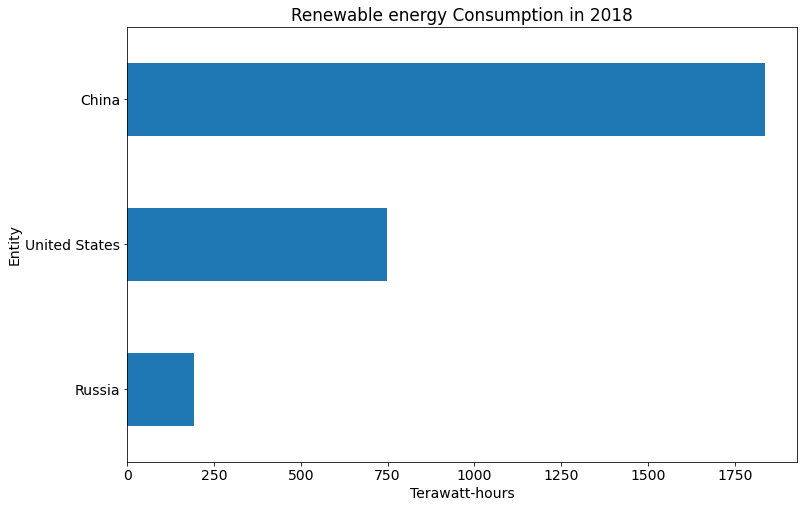

In [34]:
renewable1.countries_plot();##get the bar graph for RE consumption in the countries